# Predicting Happiness 

## Imports and dataset:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the clean and dummied dataset in
colstep = pd.read_csv('./Datasets /STEPColombia.csv')

In [3]:
# Confirming this is the correct dataset 
colstep.head()

,in_school,owns_house,house_beds,house_kitchen,reported_social_status,got_pr_transf,part_in_training,life_satisfaction,offdays_ill,healthinsurance,...,labor_market_status_1.0,job_stable_1.0,highest_ISCED_PIAAC_1,highest_ISCED_PIAAC_2,highest_ISCED_PIAAC_3,highest_ISCED_PIAAC_5,highest_ISCED_PIAAC_6,highest_ISCED_PIAAC_7,highest_ISCED_PIAAC_8,dropout_1.0
0,0.0,2,3,1,3,0,0.0,9.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,2,1,1,3,0,1.0,9.0,0.0,1.0,...,1,1,0,0,0,1,0,0,0,0
2,0.0,2,2,1,3,0,0.0,5.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,0.0,2,2,1,3,0,0.0,7.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
4,0.0,1,1,1,3,0,0.0,7.0,0.0,1.0,...,1,1,0,0,1,0,0,0,0,0


In [4]:
colstep.shape

(2617, 114)

## 1. Poisson Regression 

### 1.1. Identifying X and y 

In [5]:
# Setting the X values. Excluding life satisfaction and other features that have dummies. 
X = colstep.drop(columns=['life_satisfaction','in_school', 'owns_house', 'house_beds',
                          'house_kitchen','reported_social_status', 'got_pr_transf', 
                          'got_pu_transf', 'part_in_training','life_satisfaction', 
                          'offdays_ill', 'healthinsurance','speak_other_languaje', 
                          'lives_w_mother', 'lives_w_father','read_overall', 
                          'write_overall', 'numeracy_overall', 'supervise', 
                          'computer_use_overall', 'think_learn_work', 'autonomy_at_work',
                          'repetitiveness_at_work', 'physical_demand_work', 
                          'has_children', 'hh_size', 'gender', 'has_spouse',
                          'chronic_disease', 'shocks_bef_15', 'mother_tongue',
                          'labor_market_status', 'job_stable', 'country'])

In [6]:
X = sm.add_constant(X)

/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
# Setting y 
y = colstep['life_satisfaction']

### 1.2. Fitting poisson regression on 10-scale Y 

In [11]:
# Instantiating and fiting the model using stats models  
poi_reg = sm.GLM(y, X, 
                family=sm.families.Poisson(link = sm.families.links.log)).fit()

/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Getting coefficients 
poi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      life_satisfaction   No. Observations:                 2617
Model:                            GLM   Df Residuals:                     2537
Model Family:                 Poisson   Df Model:                           79
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5665.4
Date:                Thu, 19 Mar 2020   Deviance:                       1172.2
Time:                        15:17:52   Pearson chi2:                 1.06e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.0954      0.251      8.361      0.000       1.604       2.587
ses_15                         0.0143      0.004      3.274      0.001       0.006       0.023
extraversion_av               -0.0004      0.011     -0.034      0.973      -0.022       0.021
conscientiousness_avg         -0.0212      0.015     -1.406      0.160      -0.051       0.008
openness_av                    0.0110      0.015      0.728      0.466      -0.019       0.041
stability_av                   0.0424      0.010      4.041      0.000       0.022       0.063
agreeableness_av               0.0105      0.013      0.794      0.427      -0.015       0.036
grit_av                        0.0105      0.013      0.820      0.412      -0.015       0.035
decision_av                   -0.0250      0.013     -1.907      0.056      -0.051       0.001
hostile_av                    -0.0331      0.012     -2.669      0.008      -0.057      -0.009
risk                          -0.0043      0.007     -0.621      0.535      -0.018       0.009
age                           -0.0005      0.001     -0.634      0.526      -0.002       0.001
BMI                           -0.0008      0.002     -0.398      0.691      -0.004       0.003
hour_earnings              -7.581e-08   7.05e-07     -0.107      0.914   -1.46e-06    1.31e-06
total_hr_worked_week        -4.85e-05      0.000     -0.120      0.904      -0.001       0.001
highest_ISCED_PIAAC            0.0131      0.022      0.603      0.547      -0.029       0.056
years_educ                    -0.0074      0.008     -0.930      0.352      -0.023       0.008
wealth_index                   0.0347      0.012      2.991      0.003       0.012       0.057
overqualified                 -0.0145      0.008     -1.879      0.060      -0.030       0.001
dropout                       -0.0059      0.010     -0.567      0.571      -0.026       0.015
in_school_1.0                  0.0255      0.026      0.983      0.326      -0.025       0.076
owns_house_2                  -0.0071      0.018     -0.404      0.686      -0.042       0.027
owns_house_3                  -0.0401      0.029     -1.381      0.167      -0.097       0.017
house_beds_2                  -0.0126      0.018     -0.718      0.473      -0.047       0.022
house_beds_3                  -0.0028      0.053     -0.053      0.958      -0.107       0.102
house_kitchen_1               -0.0111      0.036     -0.305      0.761      -0.082       0.060
reported_social_status_1       0.0315      0.156      0.202      0.840      -0.274       0.337
reported_social_status_2       0.0184      0.155      0.118      0.906      -0.285       0.322
reported_social_status_3       0.0160      0.156      0.103      0.918      -0.289       0.321
reported_social_status_4       0.0159      

In [32]:
coefficients = {'ses_15': 0.0143, 'extraversion_av': -0.0004, 'conscientiousness_avg': -0.0212, 
                'openness_av': 0.0110, 'stability_av': 0.0424, 'agreeableness_av': 0.0105, 
                'grit_av': 0.0105, 'decision_av':-0.0250, 'hostile_av':-0.0331, 'risk': -0.0043, 
                'age': -0.0005, 'BMI':-0.0008, 'hour_earnings':-7.581e-08, 'total_hr_worked_week': -4.85e-05, 
                'highest_ISCED_PIAAC': 0.0131, 'years_educ': -0.0074, 'wealth_index': 0.0347, 
                'overqualified': -0.0145, 'dropout': -0.0059, 'in_school_1.0': 0.0255, 'owns_house_2': -0.0071, 
                'owns_house_3': -0.0401, 'house_beds_2': -0.0126, 'house_beds_3': -0.0028, 
                'house_kitchen_1': -0.0111, 'reported_social_status_1': 0.0315, 
                'reported_social_status_2': 0.0184, 'reported_social_status_3': 0.0160, 
                'reported_social_status_4': 0.0159, 'reported_social_status_5': -0.0016, 
                'reported_social_status_6': -0.0432, 'got_pr_transf_1':-0.0040, 'got_pu_transf_1': 0.0215, 
                'part_in_training_1.0': 0.0117, 'offdays_ill_1.0': -0.0501, 'healthinsurance_1.0': 0.0277, 
                'speak_other_languaje_1.0': -0.0309, 'lives_w_mother_1.0': 0.0204, 'lives_w_father_1.0': -0.0131, 
                'read_overall_1.0': 0.0262, 'read_overall_2.0': 0.0259, 'read_overall_3.0': 0.0299, 
                'write_overall_1.0': -0.0203, 'write_overall_2.0': -0.0130, 'write_overall_3.0': -0.0243, 
                'numeracy_overall_1.0': -0.0187, 'numeracy_overall_2.0': -0.0348, 
                'numeracy_overall_3.0': 0.0040, 'supervise_1.0': 0.0197, 'computer_use_overall_1.0': -0.0057, 
                'computer_use_overall_2.0': -0.0004, 'computer_use_overall_3.0': -0.0112, 
                'think_learn_work_1.0': 0.0102, 'think_learn_work_2.0': 0.0021, 'think_learn_work_3.0': 0.0080, 
                'autonomy_at_work_1.0': -0.0305, 'autonomy_at_work_2.0': -0.0183, 'autonomy_at_work_3.0': 0.0179,
                'repetitiveness_at_work_1.0': 0.0338, 'repetitiveness_at_work_2.0': -0.0045, 
                'repetitiveness_at_work_3.0': 0.0130, 'physical_demand_work_1.0': -0.0361, 'physical_demand_work_2.0': -0.0253, 
                'physical_demand_work_3.0': -0.0428, 'has_children_1.0': -0.0404, 'hh_size_2': -0.0201, 'gender_1': 0.0033, 
                'has_spouse_1': 0.0499, 'chronic_disease_1.0': -0.0322, 'shocks_bef_15_1.0': -0.0151, 
                'mother_tongue_1.0': -0.0298, 'labor_market_status_1.0': 0.0353, 'job_stable_1.0': 0.0056, 
                'highest_ISCED_PIAAC_1': -0.0108, 'highest_ISCED_PIAAC_2': -0.0072, 'highest_ISCED_PIAAC_3': 0.0106,
                'highest_ISCED_PIAAC_5': 0.0321, 'highest_ISCED_PIAAC_6': 0.0211, 'highest_ISCED_PIAAC_7': -0.0579, 
                'highest_ISCED_PIAAC_8': 0.0156, 'dropout_1.0': -0.0059}

In [49]:
# The list below shows that changes in 8 variables correspond to increases in happiness of between a 3% and 5%. Other 
# variables have a smaller impact. It is possible that the poisson regression is not the best model to identify 

for item, value in coefficients.items(): 
    coeff = np.exp(value)
    if coeff >= 1.03: 
        print(item,value)
        print(coeff)
    else: 
        print('No impact in model')

No impact in model
No impact in model
No impact in model
No impact in model
stability_av 0.0424
1.043311719984947
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
wealth_index 0.0347
1.0353090694852103
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
reported_social_status_1 0.0315
1.0320013755956459
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
read_overall_3.0 0.0299
1.0303514936522224
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in

## 2. Fitting logistic regression on binarized Y

In [68]:
# Creating a new column to binarize 
colstep['binary_life_satisfaction'] = colstep['life_satisfaction']

In [69]:
# Binarizing so that 0 = 5 or less, and 1 = 6 or more 
unhappy = [1,2,3,4,5]
happy = [6,7,8,9,10]

for number in unhappy: 
    colstep['binary_life_satisfaction'].replace(number,0, inplace=True)
    
for number in happy:
    colstep['binary_life_satisfaction'].replace(number,1, inplace=True)

In [70]:
# Confirming new values of y
colstep['binary_life_satisfaction'].value_counts()

1.0    2276
0.0     341
Name: binary_life_satisfaction, dtype: int64

In [71]:
# Setting y for as a binary variable 
yb = colstep['binary_life_satisfaction']

In [73]:
# Instantiating and fiting the model using stats models  
logreg = sm.GLM(yb, X, 
                family=sm.families.Binomial(link = sm.families.links.logit)).fit()

/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
# Getting coefficients 
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     binary_life_satisfaction   No. Observations:                 2617
Model:                                  GLM   Df Residuals:                     2537
Model Family:                      Binomial   Df Model:                           79
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -848.57
Date:                      Fri, 20 Mar 2020   Deviance:                       1697.1
Time:                              15:20:25   Pearson chi2:                 2.51e+03
No. Iterations:                          19                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.2562      1.870      0.672      0.502      -2.408       4.920
ses_15                         0.1929      0.041      4.758      0.000       0.113       0.272
extraversion_av               -0.1406      0.096     -1.465      0.143      -0.329       0.048
conscientiousness_avg         -0.1809      0.139     -1.297      0.195      -0.454       0.092
openness_av                    0.1991      0.129      1.541      0.123      -0.054       0.452
stability_av                   0.4002      0.094      4.240      0.000       0.215       0.585
agreeableness_av               0.0124      0.116      0.107      0.915      -0.215       0.240
grit_av                        0.0207      0.113      0.184      0.854      -0.200       0.242
decision_av                   -0.2189      0.115     -1.900      0.057      -0.445       0.007
hostile_av                    -0.4082      0.104     -3.936      0.000      -0.612      -0.205
risk                          -0.0219      0.064     -0.343      0.731      -0.147       0.103
age                           -0.0027      0.007     -0.398      0.690      -0.016       0.011
BMI                           -0.0122      0.016     -0.764      0.445      -0.043       0.019
hour_earnings               8.801e-06      1e-05      0.877      0.381   -1.09e-05    2.85e-05
total_hr_worked_week          -0.0018      0.004     -0.503      0.615      -0.009       0.005
highest_ISCED_PIAAC            0.8402    530.321      0.002      0.999   -1038.570    1040.251
years_educ                    -0.0605      0.074     -0.822      0.411      -0.205       0.084
wealth_index                   0.4449      0.103      4.323      0.000       0.243       0.647
overqualified                 -0.1388      0.065     -2.147      0.032      -0.265      -0.012
dropout                       -0.0872      0.090     -0.966      0.334      -0.264       0.090
in_school_1.0                  0.3564      0.299      1.190      0.234      -0.230       0.943
owns_house_2                   0.0983      0.161      0.609      0.542      -0.218       0.415
owns_house_3                  -0.1115      0.245     -0.455      0.649      -0.592       0.369
house_beds_2                  -0.2382      0.167     -1.428      0.153      -0.565       0.089
house_beds_3                  -0.2529      0.530     -0.477      0.633      -1.291       0.785
house_kitchen_1               -0.3204      0.286     -1.119      0.263      -0.882       0.241
reported_social_status_1       0.6997      1.027      0.681      0.496      -1.314       2.713
reported_social_status_2       0.4566      1.017      0.449      0.654      -1.537       2.450
reported_social_status_3       0.6023      1.026      0.587      0.557  

In [77]:
coefficients_logreg = {'ses_15': 0.1929, 'extraversion_av': -0.1406, 'conscientiousness_avg':-0.1809, 
                'openness_av': 0.1991, 'stability_av': 0.4002, 'agreeableness_av': 0.0124, 
                'grit_av': 0.0207, 'decision_av':-0.2189, 'hostile_av':-0.4082, 'risk': -0.0219, 
                'age': -0.0027, 'BMI':-0.0122, 'hour_earnings':8.801e-06, 'total_hr_worked_week': -0.0018, 
                'highest_ISCED_PIAAC': 0.8402, 'years_educ': -0.0605, 'wealth_index': 0.4449, 
                'overqualified': -0.1388, 'dropout': -0.0872, 'in_school_1.0': 0.3564, 'owns_house_2': 0.0983, 
                'owns_house_3':-0.1115, 'house_beds_2': -0.2382, 'house_beds_3': -0.2529, 
                'house_kitchen_1': -0.3204, 'reported_social_status_1': 0.6997, 
                'reported_social_status_2': 0.4566, 'reported_social_status_3': 0.6023, 
                'reported_social_status_4': 0.1483, 'reported_social_status_5': 0.5546, 
                'reported_social_status_6': -0.0432, 'got_pr_transf_1':0.0024, 'got_pu_transf_1': 0.1019, 
                'part_in_training_1.0': 0.0917, 'offdays_ill_1.0': 0.0517, 'healthinsurance_1.0': 0.4850, 
                'speak_other_languaje_1.0': -0.1868, 'lives_w_mother_1.0': 0.2421, 'lives_w_father_1.0': 0.0442, 
                'read_overall_1.0': 0.1261, 'read_overall_2.0': 0.3984, 'read_overall_3.0': 0.4217, 
                'write_overall_1.0': 0.0905, 'write_overall_2.0': 0.3762, 'write_overall_3.0': -0.0243, 
                'numeracy_overall_1.0': 0.1176, 'numeracy_overall_2.0': -0.0822, 
                'numeracy_overall_3.0': 0.1395, 'supervise_1.0': 0.0888, 'computer_use_overall_1.0': 0.2742, 
                'computer_use_overall_2.0': -0.2644, 'computer_use_overall_3.0': -0.1024, 
                'think_learn_work_1.0': 0.1372, 'think_learn_work_2.0': 0.0733, 'think_learn_work_3.0': 0.1505, 
                'autonomy_at_work_1.0': -0.4567, 'autonomy_at_work_2.0': -0.3696, 'autonomy_at_work_3.0': -0.1993,
                'repetitiveness_at_work_1.0': 0.1006, 'repetitiveness_at_work_2.0':0.0672, 
                'repetitiveness_at_work_3.0': -0.3868, 'physical_demand_work_1.0': -0.3446, 'physical_demand_work_2.0': -0.2605, 
                'physical_demand_work_3.0': -0.0428, 'has_children_1.0': -0.3143, 'hh_size_2': -0.1484, 'gender_1': -0.0578, 
                'has_spouse_1': 0.4047, 'chronic_disease_1.0': -0.3579, 'shocks_bef_15_1.0': -0.1890, 
                'mother_tongue_1.0': 0.4931, 'labor_market_status_1.0': 0.4203, 'job_stable_1.0': 0.3112, 
                'highest_ISCED_PIAAC_1': -0.5252, 'highest_ISCED_PIAAC_2': -1.4265, 'highest_ISCED_PIAAC_3': -1.9327,
                'highest_ISCED_PIAAC_5': -2.7007, 'highest_ISCED_PIAAC_6': -3.9744, 'highest_ISCED_PIAAC_7': -5.4589, 
                'highest_ISCED_PIAAC_8': 10.6973, 'dropout_1.0': -0.0872}

In [90]:
# The list below shows that changes in 8 variables correspond to increases in happiness of between a 3% and 5%. Other 
# variables have a smaller impact. It is possible that the poisson regression is not the best model to identify 

for item, value in coefficients_logreg.items(): 
    coeff = np.exp(value)
    if coeff >= 1.5: 
        print(item,value)
        print(coeff)
    else: 
        print('No impact in model')

No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
highest_ISCED_PIAAC 0.8402
2.316830296506876
No impact in model
wealth_index 0.4449
1.5603341546152745
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
reported_social_status_1 0.6997
2.013148672268046
reported_social_status_2 0.4566
1.5786972790252074
reported_social_status_3 0.6023
1.826314496832713
No impact in model
reported_social_status_5 0.5546
1.7412443477168658
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
healthinsurance_1.0 0.485
1.6241750088442293
No impact in model
No impact in model
No impact in model
No impact in model
No impact in model
read_overall_3.0 0.4217

## 4. PCA for Multiclass Classification 

In [34]:
# Instantiating PCA 
pca = PCA()

In [35]:
# Fitting on train data 
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
# Transforming the train data 
z_train = pca.transform(X_train_scaled)

In [37]:
# Checking resulting data 
z_traindf = pd.DataFrame(z_train).describe()

In [38]:
z_traindf

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
count,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,...,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03,1.962000e+03
mean,2.920984e-16,-9.755477e-17,-5.958536e-17,9.744159e-17,3.559278e-17,1.264138e-16,-3.078294e-17,6.269761e-17,1.801707e-16,7.243045e-18,...,-9.704549e-18,4.838128e-18,3.963870e-17,2.576091e-17,-2.750094e-17,2.659556e-17,-2.176450e-17,-4.368196e-18,2.584572e-17,1.450730e-16
std,2.655520e+00,2.046610e+00,1.674898e+00,1.516893e+00,1.414982e+00,1.383593e+00,1.316781e+00,1.299379e+00,1.273867e+00,1.251801e+00,...,4.750310e-01,4.134024e-01,3.593142e-01,3.239860e-01,2.770041e-01,2.673108e-01,1.525572e-01,5.454159e-02,1.205947e-15,1.188388e-15
min,-5.388003e+00,-4.745355e+00,-4.977375e+00,-4.373337e+00,-4.452545e+00,-4.149632e+00,-3.876473e+00,-3.362988e+00,-4.018707e+00,-3.635786e+00,...,-1.765213e+00,-1.576114e+00,-1.296093e+00,-8.654606e-01,-8.508406e-01,-1.004055e+00,-6.502201e-01,-5.868240e-02,-1.111154e-14,-4.618352e-15
25%,-2.403301e+00,-1.532179e+00,-1.185430e+00,-1.076374e+00,-9.596860e-01,-9.728178e-01,-9.151996e-01,-8.665023e-01,-9.172785e-01,-7.985253e-01,...,-3.049931e-01,-2.490098e-01,-1.906404e-01,-1.276560e-01,-1.248854e-01,-9.652162e-02,-5.903159e-02,-1.025183e-02,-7.309500e-16,-6.770599e-16
50%,-6.701541e-02,-1.884439e-01,-1.020931e-01,1.995214e-02,-2.770067e-02,-2.021905e-02,8.508707e-02,-8.598969e-02,-4.528600e-02,3.305317e-02,...,-3.816295e-02,-1.905634e-02,-2.314381e-02,-1.667598e-02,-2.464642e-02,-1.379998e-02,9.957611e-03,-1.905887e-03,-9.305067e-18,1.000962e-16
75%,2.079742e+00,1.480571e+00,1.110228e+00,1.094077e+00,9.222735e-01,9.078674e-01,9.009116e-01,7.398408e-01,9.110339e-01,8.481206e-01,...,2.741770e-01,2.017292e-01,1.825524e-01,9.632361e-02,6.861876e-02,7.589179e-02,8.633054e-02,5.805401e-03,7.123399e-16,8.772523e-16
max,7.765767e+00,5.384180e+00,5.447831e+00,5.276480e+00,4.535259e+00,4.870289e+00,5.378896e+00,5.673418e+00,4.121657e+00,4.041902e+00,...,1.899575e+00,1.615041e+00,1.318744e+00,1.403272e+00,1.483757e+00,1.368672e+00,8.583864e-01,1.197371e+00,5.042210e-15,4.119998e-15


In [39]:
# Transforming test data 
z_test = pca.transform(X_test_transf)

In [40]:
# Calculating the proportion of explained variance
var_exp = pca.explained_variance_ratio_

In [42]:
# Calculating the cumulative explained variance 
cev = np.cumsum(var_exp)

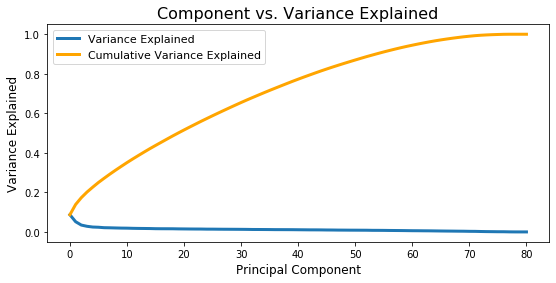

In [44]:
# Plotting the explained variance by each component as well as the cumulative one. The graph below shows that the 
# the first 40 components explain about 80% of the variance in the data. The marginal explanatory value of subsequent 
# components is relatively small. The last 15 components do not add any value in terms of explaining the variance in 
# the data. 

plt.figure(figsize=(9,4))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cev, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Label the axes.
plt.ylabel('Variance Explained', fontsize=12)
plt.xlabel('Principal Component', fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=16)
plt.legend(fontsize=11);

In [45]:
# Running the linear regression done earlier on 65 components. Instantiating: 
pca = PCA(n_components = 65)

In [46]:
# Fit PCA to training data.
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=65, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# Instantiating linear regression model. These values are very similar to those of a regular linear regression. 
linreg = LinearRegression()

# Transforming Z_train and Z_test.
Z_train = pca.transform(X_train_scaled)
Z_test = pca.transform(X_test_transf)

# Fitting on Z_train.
linreg.fit(Z_train, y_train)

# Scores on training and testing sets.
print(f'Training Score: {round(linreg.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(linreg.score(Z_test, y_test),4)}')

Training Score: 0.1432
Testing Score: 0.0872


In [48]:
# Running the logistic regression to see if there is an improvement on scores. Recall: the logistic regression
# was the best performer among multiclass regression models run in notebook 4. 
# Instantiating 

logreg = LogisticRegressionCV(multi_class='multinomial', solver = 'saga')

In [55]:
# Fitting on Z_train.
logreg.fit(Z_train, y_train)

# Scores on training and testing sets.
print(f'Training Score: {round(logreg.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(logreg.score(Z_test, y_test),4)}')

/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training Score: 0.3043
Testing Score: 0.2824


**Note:** The scores for the logistic and lineal regression are worse when using principal component analysis.  

## 5. PCA for Binary Classification 

In [57]:
# Creating a new column to binarize 
colstep['binary_life_satisfaction'] = colstep['life_satisfaction']

In [58]:
# Binarizing so that 0 = 5 or less, and 1 = 6 or more 
unhappy = [1,2,3,4,5]
happy = [6,7,8,9,10]

for number in unhappy: 
    colstep['binary_life_satisfaction'].replace(number,0, inplace=True)
    
for number in happy:
    colstep['binary_life_satisfaction'].replace(number,1, inplace=True)

In [59]:
# Confirming new values of y
colstep['binary_life_satisfaction'].value_counts()

1.0    2276
0.0     341
Name: binary_life_satisfaction, dtype: int64

In [60]:
# Setting y for as a binary variable 
yb = colstep['binary_life_satisfaction']

In [61]:
# Setting the X values. Excluding life satisfaction and other features that have dummies. 
Xb = colstep.drop(columns=['life_satisfaction','binary_life_satisfaction', 'in_school', 'owns_house', 'house_beds',
                          'house_kitchen','reported_social_status', 'got_pr_transf', 
                          'got_pu_transf', 'part_in_training','life_satisfaction', 
                          'offdays_ill', 'healthinsurance','speak_other_languaje', 
                          'lives_w_mother', 'lives_w_father','read_overall', 
                          'write_overall', 'numeracy_overall', 'supervise', 
                          'computer_use_overall', 'think_learn_work', 'autonomy_at_work',
                          'repetitiveness_at_work', 'physical_demand_work', 
                          'has_children', 'hh_size', 'gender', 'has_spouse',
                          'chronic_disease', 'shocks_bef_15', 'mother_tongue',
                          'labor_market_status', 'job_stable', 'country'])

In [62]:
# Splitting into train and test 
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, stratify=y, random_state = 42)

In [63]:
# Making sure the shapes are identical 
Xb_train.shape

(1962, 81)

In [64]:
Xb_test.shape

(655, 81)

In [65]:
yb_train.shape

(1962,)

In [66]:
yb_test.shape

(655,)

In [67]:
ss.fit(Xb_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
# Transforming X train 
Xb_train_scaled = ss.transform(Xb_train)

In [69]:
# Transforming the array into a list so I can convert it into a dataframe and concatenate it to the dataframe with the unscaled features 
Xb_train_scaled = Xb_train_scaled.tolist()

In [70]:
# Transforming the list into a dataframe 
Xb_train_scaled = pd.DataFrame(Xb_train_scaled)

In [71]:
# Looking at the resulting dataframe 
Xb_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.748998,0.487166,-0.603607,1.544888,0.653568,-2.077228,-2.126707,-1.026783,-1.187047,-0.563959,...,-1.402936,-0.787495,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
1,0.346443,-1.019644,-1.261905,-0.375131,0.197720,1.385898,0.047088,-0.600153,0.448477,-0.563959,...,0.712791,1.269849,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520
2,-0.201278,0.487166,0.054690,-0.375131,1.565264,0.808710,-0.496361,1.532998,-0.369285,-0.563959,...,-1.402936,-0.787495,-0.549476,-0.308003,-0.742286,2.308470,-0.283543,-0.075088,0.0,-0.664520
3,-0.748998,-0.015104,1.371286,0.264875,-1.625672,-0.345665,0.590536,0.253108,3.719524,2.292723,...,-1.402936,-0.787495,-0.549476,3.246718,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
4,1.441884,-0.517374,0.712988,-0.375131,0.653568,-0.922853,0.590536,-2.306673,-1.187047,-0.563959,...,0.712791,1.269849,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,-0.201278,0.989436,-0.603607,0.264875,0.653568,-0.345665,-0.496361,-1.026783,0.448477,2.292723,...,0.712791,1.269849,-0.549476,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
1958,0.346443,0.487166,-1.261905,0.264875,-0.713976,-1.500041,0.047088,-0.600153,0.448477,-0.563959,...,-1.402936,-0.787495,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,-0.664520
1959,1.441884,-0.015104,0.712988,0.264875,-1.169824,0.808710,1.133985,1.106368,-1.187047,-0.563959,...,-1.402936,-0.787495,-0.549476,3.246718,-0.742286,-0.433187,-0.283543,-0.075088,0.0,-0.664520
1960,0.894164,0.487166,0.054690,-0.375131,0.653568,-1.500041,-0.496361,-1.453413,-0.369285,-0.563959,...,-1.402936,-0.787495,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520


In [72]:
# Rename columns 
Xb_train_scaled.rename(columns = scalednames, inplace = True)

In [73]:
# Confirming 
Xb_train_scaled.head()

,ses_15,extraversion_av,conscientiousness_avg,openness_av,stability_av,agreeableness_av,grit_av,decision_av,hostile_av,risk,...,labor_market_status_1.0,job_stable_1.0,highest_ISCED_PIAAC_1,highest_ISCED_PIAAC_2,highest_ISCED_PIAAC_3,highest_ISCED_PIAAC_5,highest_ISCED_PIAAC_6,highest_ISCED_PIAAC_7,highest_ISCED_PIAAC_8,dropout_1.0
0,-0.748998,0.487166,-0.603607,1.544888,0.653568,-2.077228,-2.126707,-1.026783,-1.187047,-0.563959,...,-1.402936,-0.787495,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
1,0.346443,-1.019644,-1.261905,-0.375131,0.197720,1.385898,0.047088,-0.600153,0.448477,-0.563959,...,0.712791,1.269849,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520
2,-0.201278,0.487166,0.054690,-0.375131,1.565264,0.808710,-0.496361,1.532998,-0.369285,-0.563959,...,-1.402936,-0.787495,-0.549476,-0.308003,-0.742286,2.308470,-0.283543,-0.075088,0.0,-0.664520
3,-0.748998,-0.015104,1.371286,0.264875,-1.625672,-0.345665,0.590536,0.253108,3.719524,2.292723,...,-1.402936,-0.787495,-0.549476,3.246718,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
4,1.441884,-0.517374,0.712988,-0.375131,0.653568,-0.922853,0.590536,-2.306673,-1.187047,-0.563959,...,0.712791,1.269849,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845


In [74]:
# Confirming that the shape is intact
Xb_train.shape

(1962, 81)

In [75]:
# Transforming the X test data 
Xb_test.head()

,ses_15,extraversion_av,conscientiousness_avg,openness_av,stability_av,agreeableness_av,grit_av,decision_av,hostile_av,risk,...,labor_market_status_1.0,job_stable_1.0,highest_ISCED_PIAAC_1,highest_ISCED_PIAAC_2,highest_ISCED_PIAAC_3,highest_ISCED_PIAAC_5,highest_ISCED_PIAAC_6,highest_ISCED_PIAAC_7,highest_ISCED_PIAAC_8,dropout_1.0
43,4.0,3.000000,3.333333,3.666667,1.666667,3.666667,3.666667,3.75,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
311,6.0,2.666667,3.000000,3.333333,1.666667,3.333333,3.666667,3.75,1.0,1.0,...,1,1,0,0,0,1,0,0,0,1
294,8.0,3.666667,3.666667,4.000000,3.333333,3.333333,2.666667,4.00,1.0,2.0,...,0,0,0,0,1,0,0,0,0,0
164,3.0,2.000000,3.333333,1.666667,2.666667,2.333333,3.000000,2.25,1.5,2.0,...,1,1,0,1,0,0,0,0,0,1
720,3.0,2.333333,3.000000,3.333333,3.666667,3.000000,3.333333,3.25,1.0,1.0,...,1,1,0,0,1,0,0,0,0,0


In [76]:
# Checking the shape of data 
Xb_test.shape

(655, 81)

In [77]:
# Transforming X test 
Xb_test_transf = ss.transform(Xb_test)

In [78]:
# Looking at the result
Xb_test_transf

array([[-0.20127757, -0.01510394,  0.0546902 , ..., -0.07508751,
         0.        , -0.66452018],
       [ 0.89416374, -0.5173737 , -0.60360723, ..., -0.07508751,
         0.        ,  1.5048452 ],
       [ 1.98960506,  0.98943595,  0.7129881 , ..., -0.07508751,
         0.        , -0.66452018],
       ...,
       [-0.20127757,  0.98943595, -0.60360723, ..., -0.07508751,
         0.        ,  1.5048452 ],
       [-0.20127757,  0.98943595,  0.7129881 , ..., -0.07508751,
         0.        , -0.66452018],
       [ 0.89416374,  1.49170572,  0.7129881 , ..., -0.07508751,
         0.        , -0.66452018]])

In [79]:
# Transforming the array into a list so I can convert it into a dataframe and concatenate it to the dataframe with the unscaled features 
Xb_test_transf = Xb_test_transf.tolist()

In [80]:
# Transforming the list into a dataframe 
Xb_test_transf = pd.DataFrame(Xb_test_transf)

In [81]:
# Looking at the resulting dataframe 
Xb_test_transf

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.201278,-0.015104,0.054690,0.904882,-1.169824,0.808710,1.133985,1.106368,-1.187047,-0.563959,...,-1.402936,-0.787495,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,-0.664520
1,0.894164,-0.517374,-0.603607,0.264875,-1.169824,0.231522,1.133985,1.106368,-1.187047,-0.563959,...,0.712791,1.269849,-0.549476,-0.308003,-0.742286,2.308470,-0.283543,-0.075088,0.0,1.504845
2,1.989605,0.989436,0.712988,1.544888,1.109416,0.231522,-0.496361,1.532998,-1.187047,0.388268,...,-1.402936,-0.787495,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520
3,-0.748998,-1.521914,0.054690,-2.935157,0.197720,-1.500041,0.047088,-1.453413,-0.369285,0.388268,...,0.712791,1.269849,-0.549476,3.246718,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
4,-0.748998,-1.019644,-0.603607,0.264875,1.565264,-0.345665,0.590536,0.253108,-1.187047,-0.563959,...,0.712791,1.269849,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.346443,0.989436,-0.603607,0.264875,1.109416,-0.345665,0.047088,-0.173522,-1.187047,-0.563959,...,0.712791,-0.787495,-0.549476,-0.308003,-0.742286,2.308470,-0.283543,-0.075088,0.0,-0.664520
651,0.894164,1.491706,-0.603607,1.544888,-0.258128,-0.922853,0.047088,1.532998,-1.187047,-0.563959,...,-1.402936,-0.787495,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,-0.664520
652,-0.201278,0.989436,-0.603607,-0.375131,0.197720,-0.345665,1.133985,0.253108,1.266239,-0.563959,...,0.712791,-0.787495,-0.549476,-0.308003,-0.742286,2.308470,-0.283543,-0.075088,0.0,1.504845
653,-0.201278,0.989436,0.712988,1.544888,0.197720,-0.345665,0.047088,-0.173522,1.266239,-0.563959,...,-1.402936,-0.787495,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520


In [82]:
# Checking the shape of standardized test data 
Xb_test_transf.shape

(655, 81)

In [83]:
# Renaming columns 
Xb_test_transf.rename(columns = scalednames, inplace = True)

In [84]:
Xb_test_transf.head()

,ses_15,extraversion_av,conscientiousness_avg,openness_av,stability_av,agreeableness_av,grit_av,decision_av,hostile_av,risk,...,labor_market_status_1.0,job_stable_1.0,highest_ISCED_PIAAC_1,highest_ISCED_PIAAC_2,highest_ISCED_PIAAC_3,highest_ISCED_PIAAC_5,highest_ISCED_PIAAC_6,highest_ISCED_PIAAC_7,highest_ISCED_PIAAC_8,dropout_1.0
0,-0.201278,-0.015104,0.054690,0.904882,-1.169824,0.808710,1.133985,1.106368,-1.187047,-0.563959,...,-1.402936,-0.787495,1.819914,-0.308003,-0.742286,-0.433187,-0.283543,-0.075088,0.0,-0.664520
1,0.894164,-0.517374,-0.603607,0.264875,-1.169824,0.231522,1.133985,1.106368,-1.187047,-0.563959,...,0.712791,1.269849,-0.549476,-0.308003,-0.742286,2.308470,-0.283543,-0.075088,0.0,1.504845
2,1.989605,0.989436,0.712988,1.544888,1.109416,0.231522,-0.496361,1.532998,-1.187047,0.388268,...,-1.402936,-0.787495,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520
3,-0.748998,-1.521914,0.054690,-2.935157,0.197720,-1.500041,0.047088,-1.453413,-0.369285,0.388268,...,0.712791,1.269849,-0.549476,3.246718,-0.742286,-0.433187,-0.283543,-0.075088,0.0,1.504845
4,-0.748998,-1.019644,-0.603607,0.264875,1.565264,-0.345665,0.590536,0.253108,-1.187047,-0.563959,...,0.712791,1.269849,-0.549476,-0.308003,1.347190,-0.433187,-0.283543,-0.075088,0.0,-0.664520


In [85]:
# Instantiating a binary logistic regression  
logregbin = LogisticRegressionCV()

In [87]:
# Transforming Z_train and Z_test.
Zb_train = pca.transform(Xb_train_scaled)
Zb_test = pca.transform(Xb_test_transf)

In [89]:
# Fitting on Z_train.
logregbin.fit(Zb_train, yb_train)

# Scores on training and testing sets.
print(f'Training Score: {round(logregbin.score(Zb_train, yb_train),4)}')
print(f'Testing Score: {round(logregbin.score(Zb_test, yb_test),4)}')

/Users/vvroseth/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Score: 0.8695
Testing Score: 0.8702


**Note:** The scores for the binary classification using PCA are identical to those run in notebook 4. 